# Plot all log files to find the best combination


In [1]:
import os
import glob
import matplotlib.pyplot as plt

In [2]:
def getDataAsDict(datafile):
    with open(datafile,'r') as f:
        pullData = f.read()

    dataArray = pullData.split('\n')
    headers = dataArray.pop(0).split(',')
    dataDict = {k:[] for k in headers}
    for eachLine in dataArray:
        if len(eachLine)>1:
            vec= eachLine.split(',')
            for h,v in zip(headers,vec):
                dataDict[h].append(float(v))
    return dataDict

In [3]:
files = glob.glob('./log_u*')
files

['./log_u16_lr0001_zca.csv',
 './log_u16_lr0001_zcass_do.csv',
 './log_u16_lr0001_zcass.csv']

In [4]:
!head -n 1 ./log_u08_lr0001.csv

head: cannot open './log_u08_lr0001.csv' for reading: No such file or directory


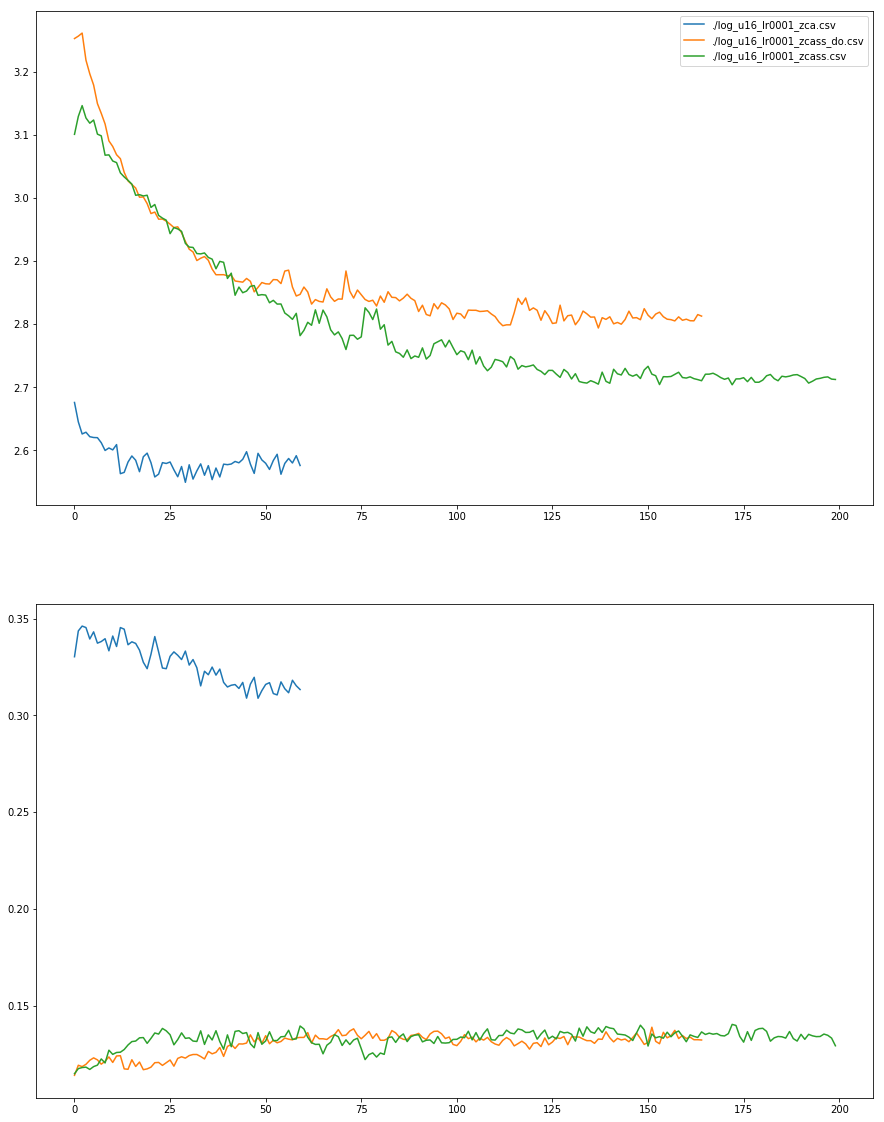

In [12]:
fdata = {}
fig=plt.figure(figsize=(15,20))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
for f in files:
    fdata[f] = getDataAsDict(f)
    ax1.plot(fdata[f]['epoch'],fdata[f]['val_loss'],label=f)
    ax2.plot(fdata[f]['epoch'],fdata[f]['val_acc'])

ax1.legend(loc='upper right')
plt.show()

In [7]:
help(plt.figure)

Help on function figure in module matplotlib.pyplot:

figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)
    Create a new figure.
    
    Parameters
    ----------
    
    num : integer or string, optional, default: None
        If not provided, a new figure will be created, and the figure number
        will be incremented. The figure objects holds this number in a `number`
        attribute.
        If num is provided, and a figure with this id already exists, make
        it active, and returns a reference to it. If this figure does not
        exists, create it and returns it.
        If num is a string, the window title will be set to this figure's
        `num`.
    
    figsize : tuple of integers, optional, default: None
        width, height in inches. If not provided, defaults to
        :rc:`figure.figsize` = ``[6.4, 4.8]``.
    
    dpi : integer, optional, default: 